In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# set project root and year
project_root = Path.cwd().parents[0]

# define input paths
raw_path = project_root / "data" / "raw" / f"Assessment_Parcels_20251112.csv"

In [3]:
parcels_df = pd.read_csv(raw_path)

/var/folders/36/_jr9z14n69x_lzy_7969swfh0000gs/T/ipykernel_48392/1296295133.py:1: DtypeWarning: Columns (2,3,4,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  parcels_df = pd.read_csv(raw_path)


In [4]:
parcels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244767 entries, 0 to 244766
Data columns (total 71 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Roll Number                      244767 non-null  int64  
 1   Street Number                    239870 non-null  object 
 2   Unit Number                      27090 non-null   object 
 3   Street Suffix                    626 non-null     object 
 4   Street Direction                 12075 non-null   object 
 5   Street Name                      241554 non-null  object 
 6   Street Type                      240888 non-null  object 
 7   Full Address                     241559 non-null  object 
 8   Neighbourhood Area               244767 non-null  object 
 9   Market Region                    244767 non-null  object 
 10  Total Living Area                219717 non-null  object 
 11  Building Type                    193338 non-null  object 
 12  Ba

In [5]:
print(parcels_df['Property Class 1'].unique())
print(parcels_df['Zoning'].unique())

['RESIDENTIAL 1' 'FARM USE VALUE' 'FARM' 'OTHER' nan 'RESIDENTIAL 2'
 'RESIDENTIAL 3' 'INSTITUTIONAL' 'STATUTORY RAILWAY' 'DESIGNATED REC'
 'STATUTORY PIPELINE' 'DESIGNATED HIGHER ED']
['A - AGRICULTURAL' 'RR2 - RURAL RESIDENTIAL-2' 'R1L - RES - S F - LARGE'
 'R2 - RES - TWO FAMILY' 'PR1 - PRKS&REC-PASSIVE'
 'RR5 - RURAL RESIDENTIAL-5' 'R1M - RES - S F - MEDIUM'
 'R1E - RES - S F - ESTATE' 'RMFS - RES - MULTI-FAMILY' nan
 'R1S - RES - S F - SMALL' 'PR2 - PRKS&REC-ACTIVE' 'C2 - COM - COMMUNITY'
 'M1 - MANUFCTRNG - LIGHT' 'RMFM - RES - MULTI-FAMILY'
 'C4 - COM - REGIONAL' 'RMU - RES - MIX USE' 'C1 - COM - NEIGHBOURHOOD'
 'R16 - SINGLE FAMILY' '120A - SINGLE FAMILY' 'R120 - SINGLE FAMILY'
 'RMFL - RES - MULTI-FAMILY' 'C3 - COM - CORRIDOR'
 'PR3 - PRKS&REC-REGIONAL' 'EI - EDUCATNL & INSTITUTN'
 'R125 - SINGLE FAMILY' 'RR2A - RURAL RESIDENTIAL'
 'M2 - MANUFCTRNG - GENERAL' 'R155 - SINGLE FAMILY'
 'RM1 - MULTIPLE FAMILY' 'M1B - IND - LIGHT' 'NA - NOT AVAILABLE'
 'MMU - MANUFCTRNG - MIXED' 'C

In [6]:
parcels_df['Total Living Area'].head()

0    1,313
1    4,007
2    1,052
3    3,120
4    1,510
Name: Total Living Area, dtype: object

In [7]:
parcels_df['Property Use Code'].unique()

array(['RESSD - DETACHED SINGLE DWELLING',
       'AGRII - IMPROVED AGRICULTURAL', 'VRES1 - VACANT RESIDENTIAL 1',
       'RESMB - RESIDENTIAL MULTIPLE BUILDINGS',
       'VAGRI - VACANT AGRICULTURAL', 'RESSS - SIDE BY SIDE',
       'VAPRK - VACANT PARK', 'CMOGV - GOVERNMENT OFFICE',
       'CNCMP - CONDO COMPLEX', 'CNRES - CONDO RESIDENTIAL',
       'PIISC - SCHOOL', 'RESAP - APARTMENTS', 'PIICH - CHURCH',
       'CMRRE - RESTAURANT', 'RESAM - APARTMENTS MULTIPLE USE',
       'PIINH - NURSING HOME', 'INMMI - INDUSTRIAL MISCELLANEOUS',
       'INWWH - WAREHOUSE', 'RESMU - RESIDENTIAL MULTIPLE USE',
       'CMRST - STORE', 'CMOFF - OFFICE',
       'CMVSR - VEHICLE SERVICE RELATED',
       'RESMA - MULTIPLE ATTACHED UNITS', 'CMSTP - STRIP MALL',
       'RESSU - RESIDENTIAL SECONDARY UNIT', 'CNAPT - CONDO APARTMENT',
       'INMMU - INDUSTRIAL MULTIPLE USE',
       'RESOT - RESIDENTIAL OUTBUILDING',
       'CMRNS - NEIGHBOURHOOD SHOPPING CENTRE',
       'PIRCC - COMMUNITY CENTRE', 'RESGC 

In [8]:
parcels_df["Total Living Area"] = (
    parcels_df["Total Living Area"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
    .replace(["", "nan", "NaN", "None", "."], pd.NA)
)

parcels_df["Total Living Area"] = pd.to_numeric(
    parcels_df["Total Living Area"],
    errors="coerce"
).astype("Int64")


In [9]:
parcels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244767 entries, 0 to 244766
Data columns (total 71 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Roll Number                      244767 non-null  int64  
 1   Street Number                    239870 non-null  object 
 2   Unit Number                      27090 non-null   object 
 3   Street Suffix                    626 non-null     object 
 4   Street Direction                 12075 non-null   object 
 5   Street Name                      241554 non-null  object 
 6   Street Type                      240888 non-null  object 
 7   Full Address                     241559 non-null  object 
 8   Neighbourhood Area               244767 non-null  object 
 9   Market Region                    244767 non-null  object 
 10  Total Living Area                219717 non-null  Int64  
 11  Building Type                    193338 non-null  object 
 12  Ba

In [19]:
mask = parcels_df["Dwelling Units"] > 0

parcels_df.loc[mask, "Property Use Code"].unique()

array(['RESSD - DETACHED SINGLE DWELLING',
       'AGRII - IMPROVED AGRICULTURAL',
       'RESMB - RESIDENTIAL MULTIPLE BUILDINGS', 'RESSS - SIDE BY SIDE',
       'CNRES - CONDO RESIDENTIAL', 'RESAP - APARTMENTS',
       'RESMU - RESIDENTIAL MULTIPLE USE',
       'RESMA - MULTIPLE ATTACHED UNITS',
       'RESSU - RESIDENTIAL SECONDARY UNIT', 'CNAPT - CONDO APARTMENT',
       'RESGC - RESIDENTIAL GROUP CARE', 'INWWH - WAREHOUSE',
       'PIICH - CHURCH', 'RESMC - MULTIFAMILY CONVERSION',
       'CMMRH - COMMERCIAL ROW HOUSE', 'RESRH - ROW HOUSING',
       'CMCMU - COMMERCIAL MULTIPLE USE', 'RESTR - TRIPLEX',
       'RESDU - DUPLEX', 'RESAM - APARTMENTS MULTIPLE USE',
       'PIRPK - PARK WITH BUILDING', 'RESRM - ROOMING HOUSE',
       'CMSTP - STRIP MALL', 'PIIGC - NON-RESIDENTIAL GROUP CARE',
       'VRES1 - VACANT RESIDENTIAL 1', 'VRES2 - VACANT RESIDENTIAL 2',
       'INMMI - INDUSTRIAL MISCELLANEOUS', 'PIMCE - CEMETERY',
       'CMRST - STORE', 'PIIDC - DAY CARE', 'VCOMM - VACANT CO

In [20]:
# Cell: Get counts and dwelling units by Property Use Code
mask = parcels_df["Dwelling Units"] > 0
residential = parcels_df[mask].copy()

analysis = residential.groupby('Property Use Code').agg({
    'Roll Number': 'count',
    'Dwelling Units': 'sum'
}).rename(columns={'Roll Number': 'parcels', 'Dwelling Units': 'total_units'})

analysis['pct_units'] = (analysis['total_units'] / analysis['total_units'].sum() * 100).round(1)
analysis['avg_units'] = (analysis['total_units'] / analysis['parcels']).round(1)

analysis = analysis.sort_values('total_units', ascending=False)
print(analysis)

                                        parcels  total_units  pct_units  \
Property Use Code                                                         
RESSD - DETACHED SINGLE DWELLING         177040     177048.0       53.5   
RESAP - APARTMENTS                         1878      79822.0       24.1   
CNAPT - CONDO APARTMENT                   20376      20376.0        6.2   
RESAM - APARTMENTS MULTIPLE USE             136      14078.0        4.3   
RESSS - SIDE BY SIDE                       9707       9712.0        2.9   
RESMC - MULTIFAMILY CONVERSION             3074       7561.0        2.3   
CNRES - CONDO RESIDENTIAL                  6137       6161.0        1.9   
CMMRH - COMMERCIAL ROW HOUSE                141       5167.0        1.6   
RESDU - DUPLEX                             1122       2255.0        0.7   
RESRH - ROW HOUSING                        1930       1953.0        0.6   
RESMA - MULTIPLE ATTACHED UNITS             810       1923.0        0.6   
RESSU - RESIDENTIAL SECON

In [21]:
# Cell: See top categories that cover most units
analysis['cumulative_pct'] = analysis['pct_units'].cumsum()
print(analysis[analysis['cumulative_pct'] <= 95])  # Top categories covering 95% of units

                                  parcels  total_units  pct_units  avg_units  \
Property Use Code                                                              
RESSD - DETACHED SINGLE DWELLING   177040     177048.0       53.5        1.0   
RESAP - APARTMENTS                   1878      79822.0       24.1       42.5   
CNAPT - CONDO APARTMENT             20376      20376.0        6.2        1.0   
RESAM - APARTMENTS MULTIPLE USE       136      14078.0        4.3      103.5   
RESSS - SIDE BY SIDE                 9707       9712.0        2.9        1.0   
RESMC - MULTIFAMILY CONVERSION       3074       7561.0        2.3        2.5   

                                  cumulative_pct  
Property Use Code                                 
RESSD - DETACHED SINGLE DWELLING            53.5  
RESAP - APARTMENTS                          77.6  
CNAPT - CONDO APARTMENT                     83.8  
RESAM - APARTMENTS MULTIPLE USE             88.1  
RESSS - SIDE BY SIDE                        91.0  
RE

In [23]:
# Cell: Separate obvious apartments vs obvious owned homes
apartments = ['RESAP - APARTMENTS', 'RESAM - APARTMENTS MULTIPLE USE']
single_family = ['RESSD - DETACHED SINGLE DWELLING']

apt_units = analysis.loc[analysis.index.isin(apartments), 'total_units'].sum()
sf_units = analysis.loc[analysis.index.isin(single_family), 'total_units'].sum()
total_units = analysis['total_units'].sum()

print(f"Apartments: {apt_units:,.0f} units ({apt_units/total_units*100:.1f}%)")
print(f"Single Family: {sf_units:,.0f} units ({sf_units/total_units*100:.1f}%)")
print(f"Everything else: {total_units - apt_units - sf_units:,.0f} units ({(total_units - apt_units - sf_units)/total_units*100:.1f}%)")

Apartments: 93,900 units (28.4%)
Single Family: 177,048 units (53.5%)
Everything else: 59,710 units (18.1%)


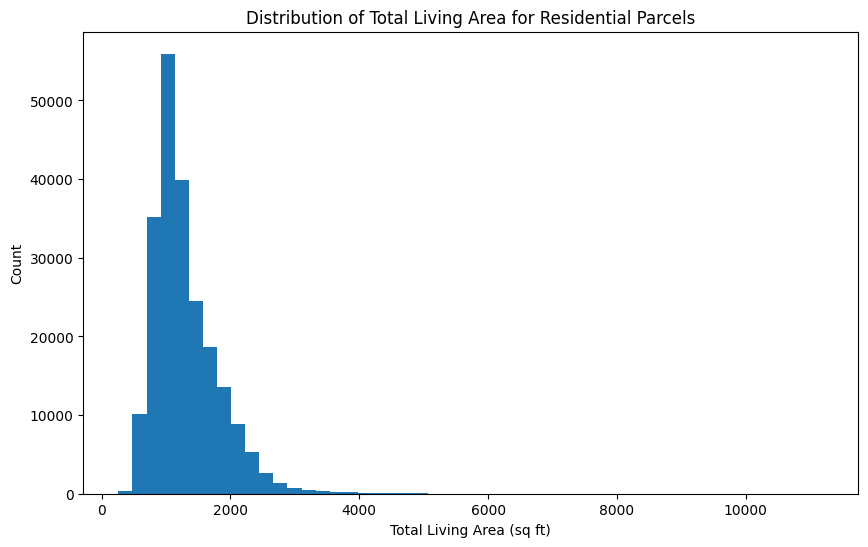

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(parcels_df.loc[mask, "Total Living Area"], bins=50)
plt.xlabel("Total Living Area (sq ft)")
plt.ylabel("Count")
plt.title("Distribution of Total Living Area for Residential Parcels")
plt.show()

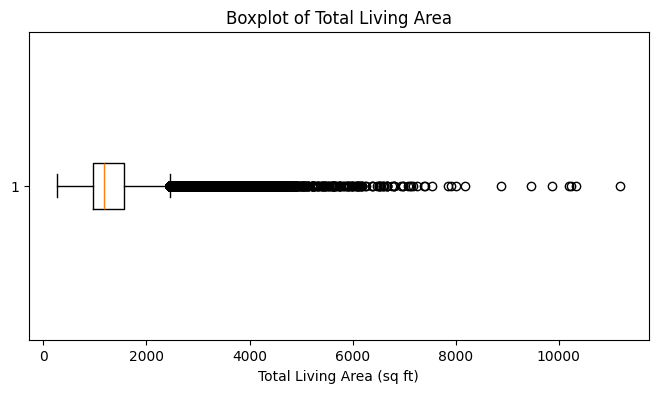

In [12]:
plt.figure(figsize=(8, 4))
plt.boxplot(parcels_df.loc[mask, "Total Living Area"].dropna(), vert=False)
plt.xlabel("Total Living Area (sq ft)")
plt.title("Boxplot of Total Living Area")
plt.show()

In [13]:
mask = parcels_df["Total Living Area"] > 0

parcels_df.loc[mask, "Total Living Area"].describe()

count      219717.0
mean      1304.9081
std      520.123153
min           260.0
25%           960.0
50%          1170.0
75%          1556.0
max         11197.0
Name: Total Living Area, dtype: Float64

In [14]:
mask_zero_or_na = (
    parcels_df["Total Living Area"].isna() |
    (parcels_df["Total Living Area"] == 0)
)

codes = parcels_df.loc[mask_zero_or_na, "Property Use Code"].tolist()
codes

['AGRII - IMPROVED AGRICULTURAL',
 'VRES1 - VACANT RESIDENTIAL 1',
 'RESMB - RESIDENTIAL MULTIPLE BUILDINGS',
 'VRES1 - VACANT RESIDENTIAL 1',
 'VRES1 - VACANT RESIDENTIAL 1',
 'AGRII - IMPROVED AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRICULTURAL',
 'VAGRI - VACANT AGRIC

In [15]:
pd.set_option("display.max_rows", None)
pd.Series(codes).value_counts()

VRES1 - VACANT RESIDENTIAL 1              6787
RESAP - APARTMENTS                        1897
INWWH - WAREHOUSE                         1666
VAPRK - VACANT PARK                       1162
RESSD - DETACHED SINGLE DWELLING           943
VAGRI - VACANT AGRICULTURAL                939
CMRST - STORE                              865
CMOFF - OFFICE                             819
VINDU - VACANT INDUSTRIAL                  801
CNCMP - CONDO COMPLEX                      769
VCOMM - VACANT COMMERCIAL                  607
PIICH - CHURCH                             456
CMVSR - VEHICLE SERVICE RELATED            433
CNAPT - CONDO APARTMENT                    395
VRES2 - VACANT RESIDENTIAL 2               386
RESGC - RESIDENTIAL GROUP CARE             369
RESSS - SIDE BY SIDE                       348
PIISC - SCHOOL                             339
CMCMU - COMMERCIAL MULTIPLE USE            334
CNVAC - CONDO VACANT                       298
CMRRE - RESTAURANT                         291
RESMU - RESID

In [16]:
mask_zero = parcels_df["Total Living Area"].isna() | (parcels_df["Total Living Area"] == 0)

ressd_zero = parcels_df.loc[
    mask_zero & (parcels_df["Property Use Code"] == "RESSD - DETACHED SINGLE DWELLING")
]


In [17]:
ressd_zero.head(20)

,Roll Number,Street Number,Unit Number,Street Suffix,Street Direction,Street Name,Street Type,Full Address,Neighbourhood Area,Market Region,Total Living Area,Building Type,Basement,Basement Finish,Year Built,Rooms,Air Conditioning,Fire Place,Attached Garage,Detached Garage,Pool,Number Floors (Condo),Property Use Code,Assessed Land Area,Water Frontage Measurement,Sewer Frontage Measurement,Property Influences,Zoning,Total Assessed Value,Total Proposed Assessment Value,Assessment Date,Detail URL,Current Assessment Year,Property Class 1,Status 1,Assessed Value 1,Property Class 2,Status 2,Assessed Value 2,Property Class 3,Status 3,Assessed Value 3,Property Class 4,Status 4,Assessed Value 4,Property Class 5,Status 5,Assessed Value 5,Proposed Assessment Year,Proposed Assessment Date,Proposed Property Class 1,Proposed Status 1,Proposed Assessment Value 1,Proposed Property Class 2,Proposed Status 2,Proposed Assessment Value 2,Proposed Property Class 3,Proposed Status 3,Proposed Assessment Value 3,Proposed Property Class 4,Proposed Status 4,Proposed Assessment Value 4,Proposed Property Class 5,Proposed Status 5,Proposed Assessment Value 5,Multiple Residences,Geometry,Dwelling Units,Centroid Lat,Centroid Lon,GISID
15911,2040309000,403,NaN,NaN,NaN,JAMISON,AVENUE,403 JAMISON AVENUE,CHALMERS,"2, EAST KILDONAN / NORTH KILDONAN",<NA>,ONE STOREY,No,No,1914.0,5.0,No,No,No,No,No,NaN,RESSD - DETACHED SINGLE DWELLING,"2,544",25,25,NaN,R1S - RES - S F - SMALL,"$95,000.00",NaN,2023-04-01,http://www.winnipegassessment.com/AsmtPub/engl...,2026,RESIDENTIAL 1,TAXABLE,"$95,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.10342058366992 49.91664908...,1.0,49.916509,-97.103472,"53,025"
21297,3034040000,73,NaN,NaN,NaN,MACBELL,ROAD,73 MACBELL ROAD,CLOUTIER DRIVE,"8, FORT GARRY / LINDENWOODS",<NA>,TWO STOREY,NaN,No,2025.0,NaN,Yes,No,No,No,No,NaN,RESSD - DETACHED SINGLE DWELLING,"130,244",NaN,NaN,"ACCESS,RED RIVER ADJACENT",RR5 - RURAL RESIDENTIAL-5,"$562,000.00",NaN,2023-04-01,http://www.winnipegassessment.com/AsmtPub/engl...,2026,RESIDENTIAL 1,TAXABLE,"$562,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.1329426844721 49.779527534...,0.0,49.779848,-97.133354,"170,151"
62959,4007253045,194,NaN,NaN,NaN,PHILIP LEE,DRIVE,194 PHILIP LEE DRIVE,PEGUIS,"1, TRANSCONA",<NA>,NaN,NaN,No,NaN,NaN,NaN,No,No,No,No,NaN,RESSD - DETACHED SINGLE DWELLING,"6,171",40,40,RAIL LINE,R1M - RES - S F - MEDIUM,"$493,000.00",NaN,2023-04-01,http://www.winnipegassessment.com/AsmtPub/engl...,2026,RESIDENTIAL 1,TAXABLE,"$493,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.05055795011558 49.91144460...,1.0,49.911226,-97.050561,"601,627"
62960,4007253050,190,NaN,NaN,NaN,PHILIP LEE,DRIVE,190 PHILIP LEE DRIVE,PEGUIS,"1, TRANSCONA",<NA>,NaN,NaN,No,NaN,NaN,NaN,No,No,No,No,NaN,RESSD - DETACHED SINGLE DWELLING,"6,170",40,40,RAIL LINE,R1M - RES - S F - MEDIUM,"$521,000.00",NaN,2023-04-01,http://www.winnipegassessment.com/AsmtPub/engl...,2026,RESIDENTIAL 1,TAXABLE,"$521,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.05072270524077 49.91141793...,1.0,49.911200,-97.050726,"601,629"
62961,4007253055,186,NaN,NaN,NaN,PHILIP LEE,DRIVE,186 PHILIP LEE DRIVE,PEGUIS,"1, TRANSCONA",<NA>,NaN,NaN,No,NaN,NaN,NaN,No,No,No,No,NaN,RESSD - DETACHED SINGLE DWELLING,"6,170",40,40,RAIL LINE,R1M - RES - S F - MEDIUM,"$533,000.00",NaN,2023-04-01,http://www.winnipegassessment.com/AsmtPub/engl...,2026,RESIDENTIAL 1,TAXABLE,"$533,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,MULTIPOLYGON (((-97.0508874585344 49.911391265...,1.0,49.911173,-97.050890,"601,630